This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6114 - accuracy: 0.8139 - val_loss: 0.2874 - val_accuracy: 0.9126
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2486 - accuracy: 0.9214 - val_loss: 0.1773 - val_accuracy: 0.9475
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1620 - accuracy: 0.9500 - val_loss: 0.1644 - val_accuracy: 0.9501
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1142 - accuracy: 0.9637 - val_loss: 0.1342 - val_accuracy: 0.9617
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0848 - accuracy: 0.9733 - val_loss: 0.1405 - val_accuracy: 0.9606
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0614 - accuracy: 0.9813 - val_loss: 0.1244 - val_accuracy: 0.9655
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.1154 - val_accuracy: 0.9710
Epoch 

**Plotting a validation accuracy comparison**

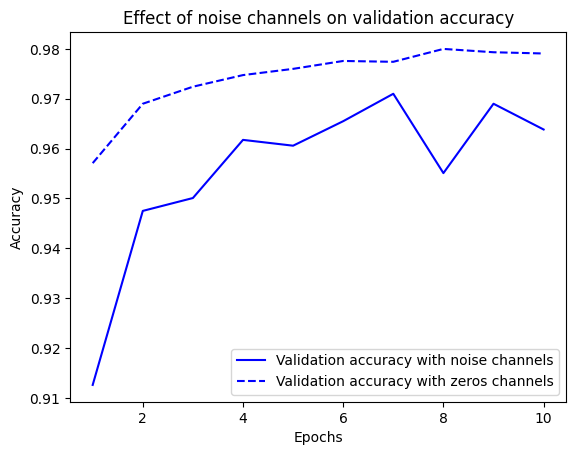

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3177 - accuracy: 0.1028 - val_loss: 2.3086 - val_accuracy: 0.1027
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3009 - accuracy: 0.1159 - val_loss: 2.3127 - val_accuracy: 0.1107
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2913 - accuracy: 0.1252 - val_loss: 2.3213 - val_accuracy: 0.0954
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2773 - accuracy: 0.1406 - val_loss: 2.3294 - val_accuracy: 0.1033
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2604 - accuracy: 0.1515 - val_loss: 2.3343 - val_accuracy: 0.0959
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2390 - accuracy: 0.1667 - val_loss: 2.3603 - val_accuracy: 0.0940
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2142 - accuracy: 0.1860 - val_loss: 2.3725 - val_accuracy: 0.1030

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 550.6548 - accuracy: 0.2630 - val_loss: 2.4675 - val_accuracy: 0.1292
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 4.0530 - accuracy: 0.1831 - val_loss: 2.5111 - val_accuracy: 0.1678
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.7369 - accuracy: 0.1584 - val_loss: 2.2475 - val_accuracy: 0.1693
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.4983 - accuracy: 0.1637 - val_loss: 2.2875 - val_accuracy: 0.1928
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4018 - accuracy: 0.1732 - val_loss: 2.3336 - val_accuracy: 0.1780
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4421 - accuracy: 0.1861 - val_loss: 2.3814 - val_accuracy: 0.1287
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4556 - accuracy: 0.1883 - val_loss: 2.1738 - val_accuracy: 0.1996
Epoc

**The same model with a more appropriate learning rate**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.9119 - val_loss: 0.1526 - val_accuracy: 0.9553
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1271 - accuracy: 0.9647 - val_loss: 0.1430 - val_accuracy: 0.9644
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9738 - val_loss: 0.1504 - val_accuracy: 0.9686
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9792 - val_loss: 0.1667 - val_accuracy: 0.9692
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9826 - val_loss: 0.1726 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9851 - val_loss: 0.1898 - val_accuracy: 0.9695
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0575 - accuracy: 0.9866 - val_loss: 0.1833 - val_accuracy: 0.9754
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [14]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 0s 682us/step - loss: 0.6641 - accuracy: 0.8383 - val_loss: 0.3568 - val_accuracy: 0.9064
Epoch 2/20
375/375 [==============================] - 0s 545us/step - loss: 0.3509 - accuracy: 0.9024 - val_loss: 0.3075 - val_accuracy: 0.9138
Epoch 3/20
375/375 [==============================] - 0s 567us/step - loss: 0.3151 - accuracy: 0.9124 - val_loss: 0.2913 - val_accuracy: 0.9202
Epoch 4/20
375/375 [==============================] - 0s 560us/step - loss: 0.2991 - accuracy: 0.9166 - val_loss: 0.2822 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 0s 553us/step - loss: 0.2898 - accuracy: 0.9195 - val_loss: 0.2759 - val_accuracy: 0.9228
Epoch 6/20
375/375 [==============================] - 0s 544us/step - loss: 0.2832 - accuracy: 0.9209 - val_loss: 0.2755 - val_accuracy: 0.9237
Epoch 7/20
375/375 [==============================] - 0s 576us/step - loss: 0.2783 - accuracy: 0.9226 - val_loss: 0.2711 - val_accuracy:

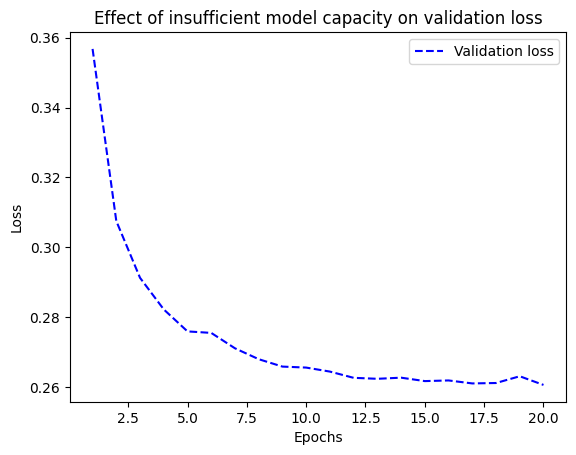

In [17]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [16]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3572 - accuracy: 0.8996 - val_loss: 0.1821 - val_accuracy: 0.9476
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.9520 - val_loss: 0.1500 - val_accuracy: 0.9549
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9663 - val_loss: 0.1087 - val_accuracy: 0.9684
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9735 - val_loss: 0.1014 - val_accuracy: 0.9707
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9789 - val_loss: 0.0998 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.9824 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0975 - val_accuracy: 0.9712
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5240 - accuracy: 0.7905 - val_loss: 0.3950 - val_accuracy: 0.8737
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3174 - accuracy: 0.9026 - val_loss: 0.3076 - val_accuracy: 0.8899
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.9275 - val_loss: 0.2767 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1801 - accuracy: 0.9407 - val_loss: 0.2778 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.9539 - val_loss: 0.2764 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1184 - accuracy: 0.9638 - val_loss: 0.2873 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0999 - accuracy: 0.9699 - val_loss: 0.3098 - val_accuracy: 0.8845
Epoch 8/20
30/30 [=

**Version of the model with lower capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 12ms/step - loss: 0.5806 - accuracy: 0.7772 - val_loss: 0.4891 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4246 - accuracy: 0.8811 - val_loss: 0.3980 - val_accuracy: 0.8718
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3374 - accuracy: 0.9024 - val_loss: 0.3446 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2791 - accuracy: 0.9147 - val_loss: 0.3134 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.9264 - val_loss: 0.2907 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2072 - accuracy: 0.9380 - val_loss: 0.2791 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9437 - val_loss: 0.2732 - val_accuracy: 0.8912
Epoch 8/20
30/30 [=

**Version of the model with higher capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 64ms/step - loss: 0.5418 - accuracy: 0.7658 - val_loss: 0.4645 - val_accuracy: 0.7699
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2472 - accuracy: 0.9045 - val_loss: 0.2791 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1583 - accuracy: 0.9383 - val_loss: 0.2701 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0661 - accuracy: 0.9770 - val_loss: 0.3530 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0869 - accuracy: 0.9767 - val_loss: 0.4237 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.5392 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 5.1376e-04 - accuracy: 0.9999 - val_loss: 0.6542 - val_accuracy: 0.8880
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [21]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5843 - accuracy: 0.7899 - val_loss: 0.4592 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3966 - accuracy: 0.8921 - val_loss: 0.4110 - val_accuracy: 0.8676
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.9126 - val_loss: 0.3716 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2990 - accuracy: 0.9234 - val_loss: 0.3874 - val_accuracy: 0.8718
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2785 - accuracy: 0.9309 - val_loss: 0.3559 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2662 - accuracy: 0.9342 - val_loss: 0.3608 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.9401 - val_loss: 0.3630 - val_accuracy: 0.8839
Epoch 8/20
30/30 [=

**Different weight regularizers available in Keras**

In [22]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 12ms/step - loss: 0.6433 - accuracy: 0.6158 - val_loss: 0.5593 - val_accuracy: 0.7814
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.7501 - val_loss: 0.4716 - val_accuracy: 0.8382
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4700 - accuracy: 0.8201 - val_loss: 0.3991 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4063 - accuracy: 0.8645 - val_loss: 0.3493 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3557 - accuracy: 0.8867 - val_loss: 0.3213 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.9048 - val_loss: 0.3013 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2730 - accuracy: 0.9161 - val_loss: 0.2968 - val_accuracy: 0.8822
Epoch 8/20
30/30 [=

## Summary